# Installing Face-recogonition Library


In [ ]:
!pip install face_recognition

# Two sets of images can be used.
 Either we can use images from the internet or from our personal drives. However either one set can be runned at a time.

# 1st set: using zip from drive
Unzipping the Known and Unknown images from the Drive

'Known.zip' contains images of known(named) peoples which we are going to feed to the machine.

'Unknown.zip" contains images which is going to be used for the recogonition part.

In [26]:
! unzip -q /content/drive/My\ Drive/Known.zip
! unzip -q /content/drive/My\ Drive/Unknown.zip

# 2nd set: using images from the internet.
Here you can uncomment the next two blocks of code and replace the link of the images you are goin to use.

In [7]:
# !mkdir known 
# !wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon.jpg
# !wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O known/bill.jpg
# !wget https://lh3.googleusercontent.com/proxy/Gdf9Zd0kJ3jFwqtQbhF7tulJDBAVVha5cl9zDya0F2tV1lG0rhboW-7aQVj4iO6I0kJfFs5cK9rGsxgAWzf9uVd4szaQfx1TAoPPyg_vcVCwtP2hTkfDYffKGRmKrEtgK1Q65wsrQdo -O known/AK.jpg

In [8]:
# !mkdir unknown
# !wget https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/A._P._J._Abdul_Kalam_in_2008.jpg/450px-A._P._J._Abdul_Kalam_in_2008.jpg -O unknown/1.jpg
# !wget https://lh3.googleusercontent.com/proxy/YGaB2YjZn2HPIFxHJRcptJHL43RFTjunbjbD5VaKtFmGkZJYZO1cn8h7AH_nuPfGz2jlrcyS-WPskLrNNakjK0UJ7eXwuzunnZduj4qP5f008vM_wXfvPfJucfUGgw -O unknown/2.jpeg
# !wget https://www.theafricareport.com/media/2020/04/billgatesal-jpg-288295-original-732x419.jpg -O unknown/3.jpg
# !wget https://yt3.ggpht.com/a/AATXAJzkHWxWVrI8Q3dUb4fFd36Ayu89rtXhQfJJ7ONyhfA=s900-c-k-c0xffffffff-no-rj-mo -O unknown/4.jpg


# Importing all the required packages

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

# Function to resize the images

In [30]:
def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float (w)
  height = int (h * ratio)
  return cv2.resize(img, (width, height))

# Main code

processing IMG-20200121-WA0014.jpg


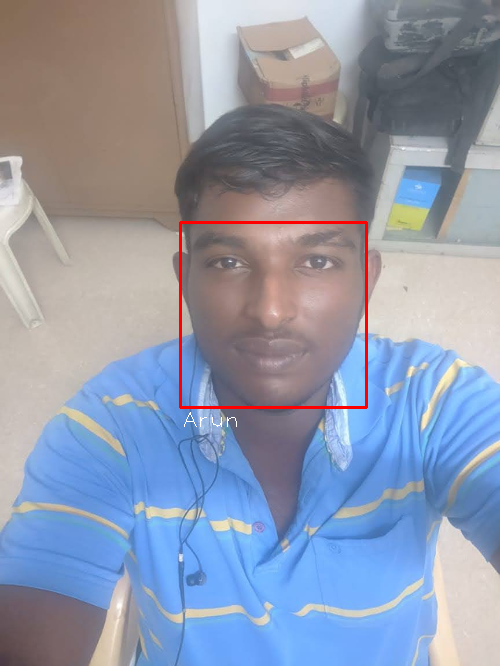

[False, False, True]
processing IMG_8421.jpg


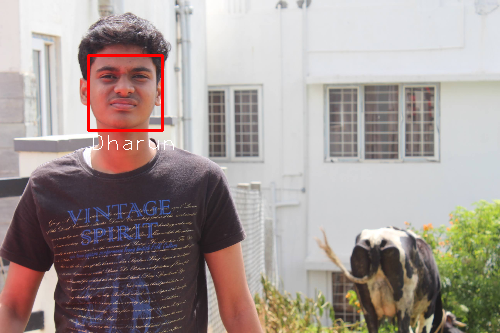

[False, True, False]
processing Screenshot_2020-09-21-18-37-48-177_com.google.android.apps.photos.jpg


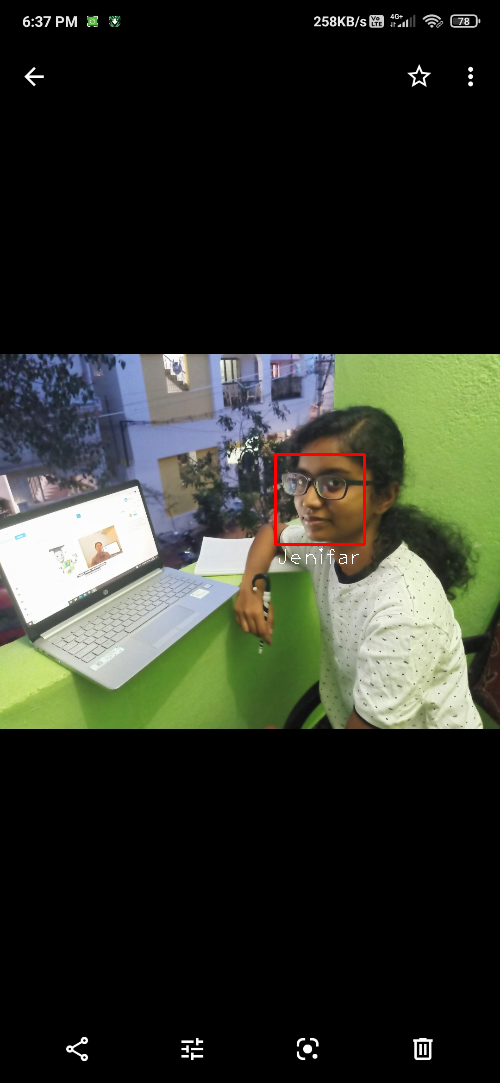

[True, False, False]


In [38]:
known_encodings = []        #to store the encoding generated for each images.
known_names = []            #to store the name of each image.
known_dir = 'Known'         #this variable has the directory 'Known' and the following below code is used
                            #to iterate through each image in that directory. 

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])



unknown_dir = 'Unknown'     #this variable has the directory 'Unknown' and the following below code is used
                            #to iterate through each image in that directory.

for file in os.listdir(unknown_dir):
  print("processing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]


# HERE TWO DIFFERENT METHODS CAN BE USED TO RECOGNIZE THE FACES
# 1)using compare_faces method , where it actually compares the encodings of two images. 
  results = face_recognition.compare_faces(known_encodings, img_enc)

# 2)using face_distance method , where the shortest distance between two encoding of respective images is used.
  #both methods can be used at the same time. Uncomment the print statement if needed.
  
  #print(face_recognition.face_distance(known_encodings, img_enc))

  for i in range(len(results)):            #bounding boxes for the recogonised images.
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2) 
                                                                  
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 1)
      cv2_imshow(img)
  print(results)